# Exercise 1: Exploring Class Separability in 2D

Generate 400 synthetic samples (100 per class) using specific Gaussian distributions and analyze class separability.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [5]:
# Generate 4 classes with 100 samples each (400 total)
# Class 0: mean[2,3], std[0.8,2.5]
cov_0 = np.diag([0.8**2, 2.5**2])  # Diagonal covariance matrix
class_0 = np.random.multivariate_normal([2, 3], cov_0, 100)

# Class 1: mean[5,6], std[1.2,1.9]
cov_1 = np.diag([1.2**2, 1.9**2])
class_1 = np.random.multivariate_normal([5, 6], cov_1, 100)

# Class 2: mean[8,1], std[0.9,0.9]
cov_2 = np.diag([0.9**2, 0.9**2])
class_2 = np.random.multivariate_normal([8, 1], cov_2, 100)

# Class 3: mean[15,4], std[0.5,2.0]
cov_3 = np.diag([0.5**2, 2.0**2])
class_3 = np.random.multivariate_normal([15, 4], cov_3, 100)

# Combine all data
X = np.vstack([class_0, class_1, class_2, class_3])
y = np.hstack([np.zeros(100), np.ones(100), np.full(100, 2), np.full(100, 3)])

print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Class distribution: {np.bincount(y.astype(int))}")

# Verify means and standard deviations
for i in range(4):
    mask = y == i
    class_data = X[mask]
    mean_actual = np.mean(class_data, axis=0)
    std_actual = np.std(class_data, axis=0)
    print(f"Class {i}: mean={mean_actual}, std={std_actual}")

Dataset shape: (400, 2)
Labels shape: (400,)
Class distribution: [100 100 100 100]
Class 0: mean=[2.02721786 2.71108936], std=[0.79508137 2.13005222]
Class 1: mean=[5.05218518 6.24367258], std=[1.11612463 1.9653072 ]
Class 2: mean=[7.95946635 0.88635459], std=[0.91784689 0.86465841]
Class 3: mean=[15.04720768  3.84703586], std=[0.51479317 1.9940084 ]


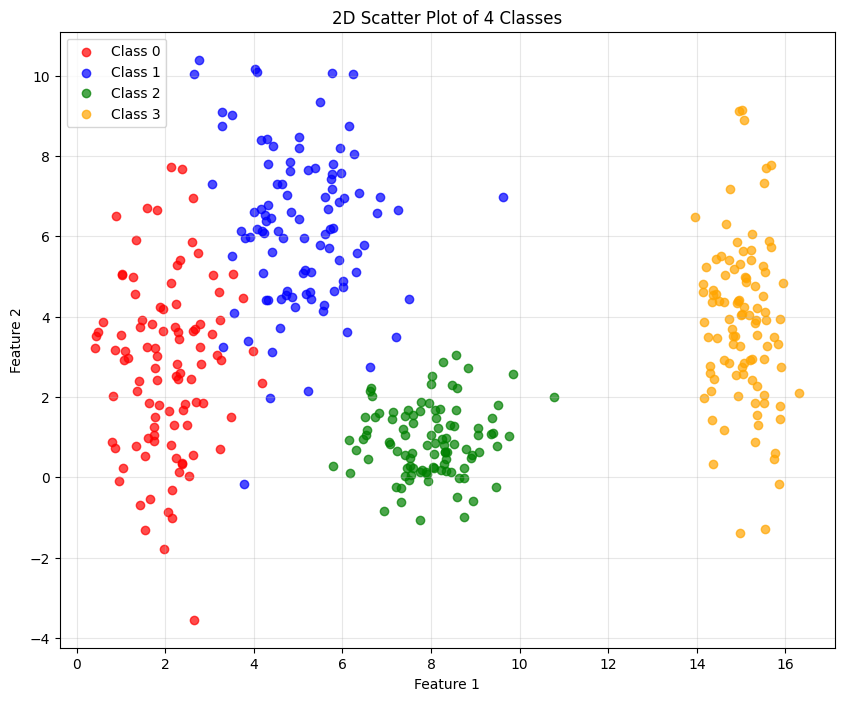

In [6]:
# Create scatter plot
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'orange']
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

for i in range(4):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=class_names[i], alpha=0.7)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Scatter Plot of 4 Classes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Analysis

The classes are well-separated in 2D space with clear decision boundaries. Each class forms a distinct cluster centered at its respective mean position.

b) A simple linear bondary can separate all classes. However, it will require 4 linear boundaries to do so. 

c)

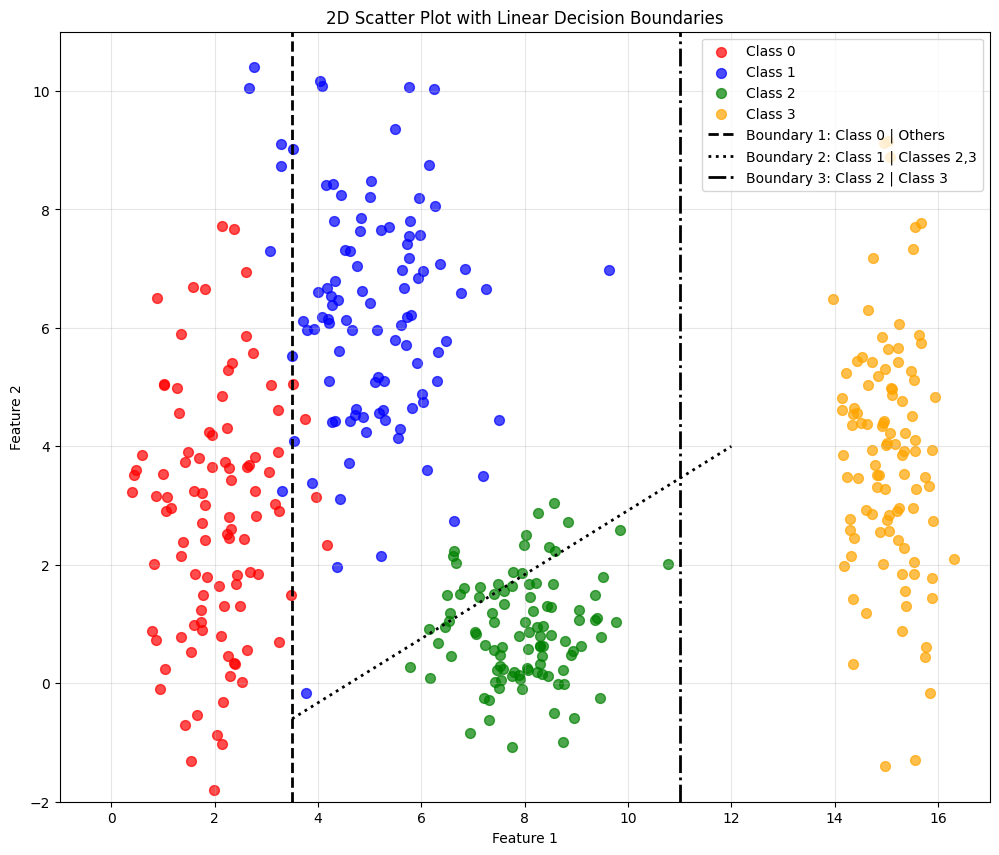

In [9]:
# Create the same scatter plot with decision boundaries
plt.figure(figsize=(12, 10))

# Plot the data points
for i in range(4):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=class_names[i], alpha=0.7, s=50)

# Define decision boundaries based on the class centers and separations
# These boundaries are chosen to optimally separate the classes

# Boundary 1: Separates Class 0 from Classes 1, 2, 3 (vertical line around x=3.5)
x1 = np.array([3.5, 3.5])
y1 = np.array([-2, 11])
plt.plot(x1, y1, 'k--', linewidth=2, label='Boundary 1: Class 0 | Others')

# Boundary 2: Separates Class 1 from Classes 2, 3 (diagonal line)
x2 = np.array([3.5, 12])
y2 = np.array([-0.6, 4])
plt.plot(x2, y2, 'k:', linewidth=2, label='Boundary 2: Class 1 | Classes 2,3')

# Boundary 3: Separates Class 2 from Class 3 (vertical line around x=11)
x3 = np.array([11, 11])
y3 = np.array([-2, 11])
plt.plot(x3, y3, 'k-.', linewidth=2, label='Boundary 3: Class 2 | Class 3')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Scatter Plot with Linear Decision Boundaries')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-1, 17)
plt.ylim(-2, 11)
plt.show()